<a href="https://colab.research.google.com/github/Gamma7787/Python_Assignment/blob/master/224272E_SOT_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Getting the data import library for data visualisation

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import google.colab
file_name = "/content/weatherHistory.csv"

# read data into memory
ds = pd.read_csv(file_name)

# Step 2: Checking the first 5 rows of the dataset and visualise the data for insight

In [9]:
ds.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


The summary statistics for a dataset

In [10]:
ds.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Knowing the column and row or the dataset

In [11]:
ds.shape

(96453, 12)

Data visualization of various fields/column

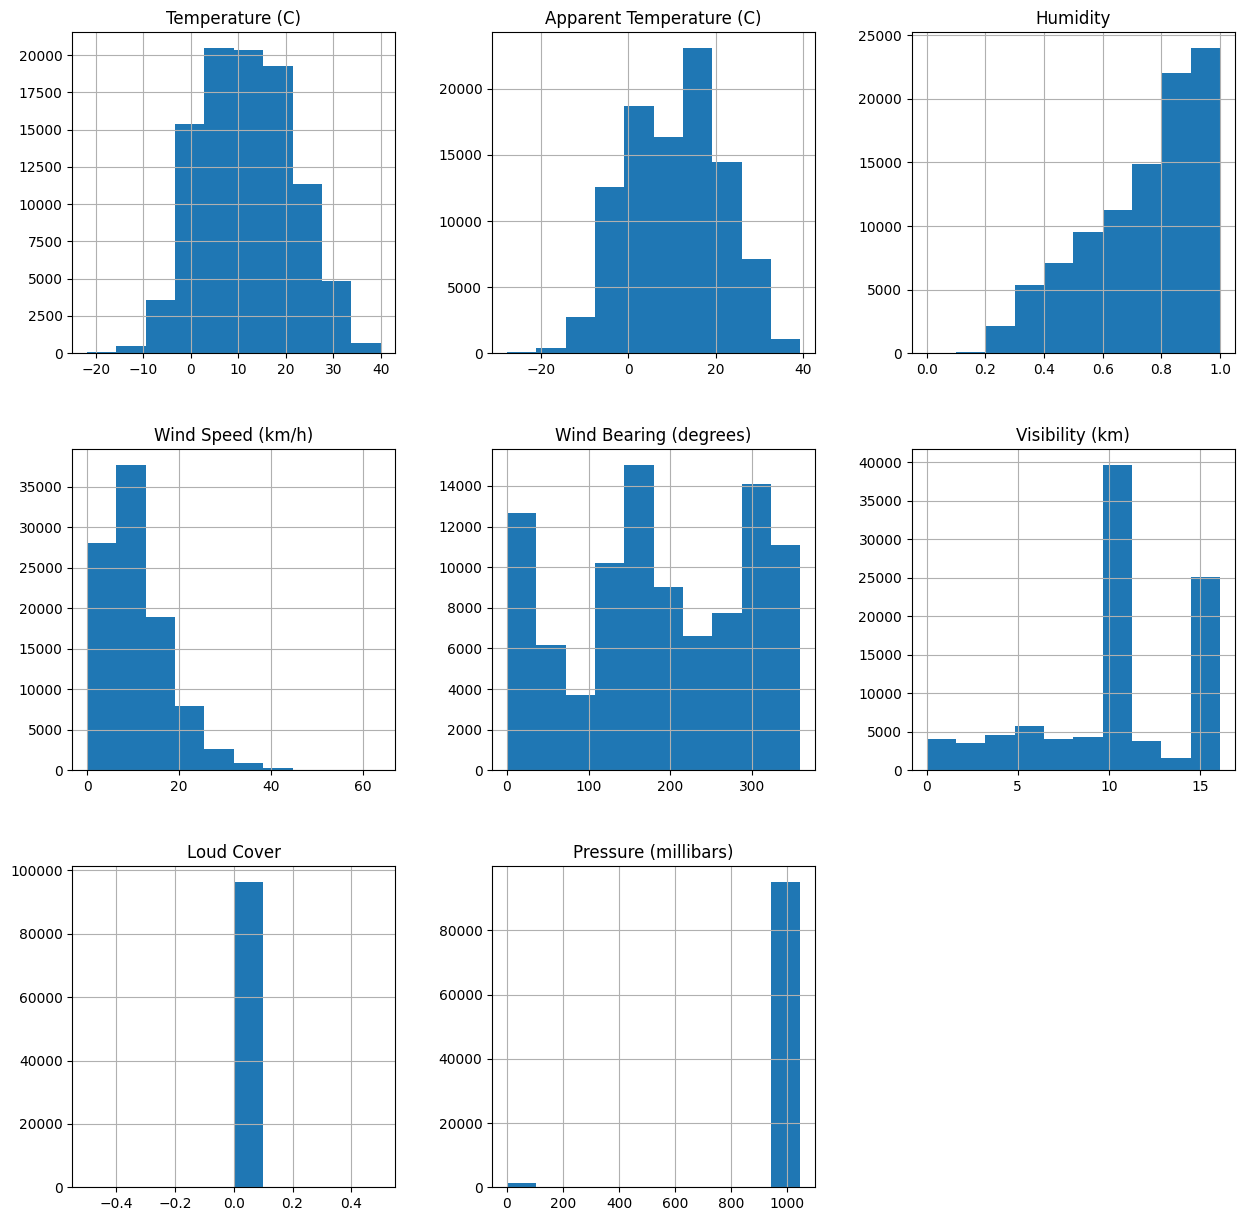

In [12]:
ds.hist(figsize=(15,15))
plt.show()

Correcting the date time first for visualisation

In [13]:
ds['Formatted Date'] = pd.to_datetime(ds['Formatted Date'], errors='coerce')

Checking if there is any significant different between Temperature and Apparent Temperature by using different graph

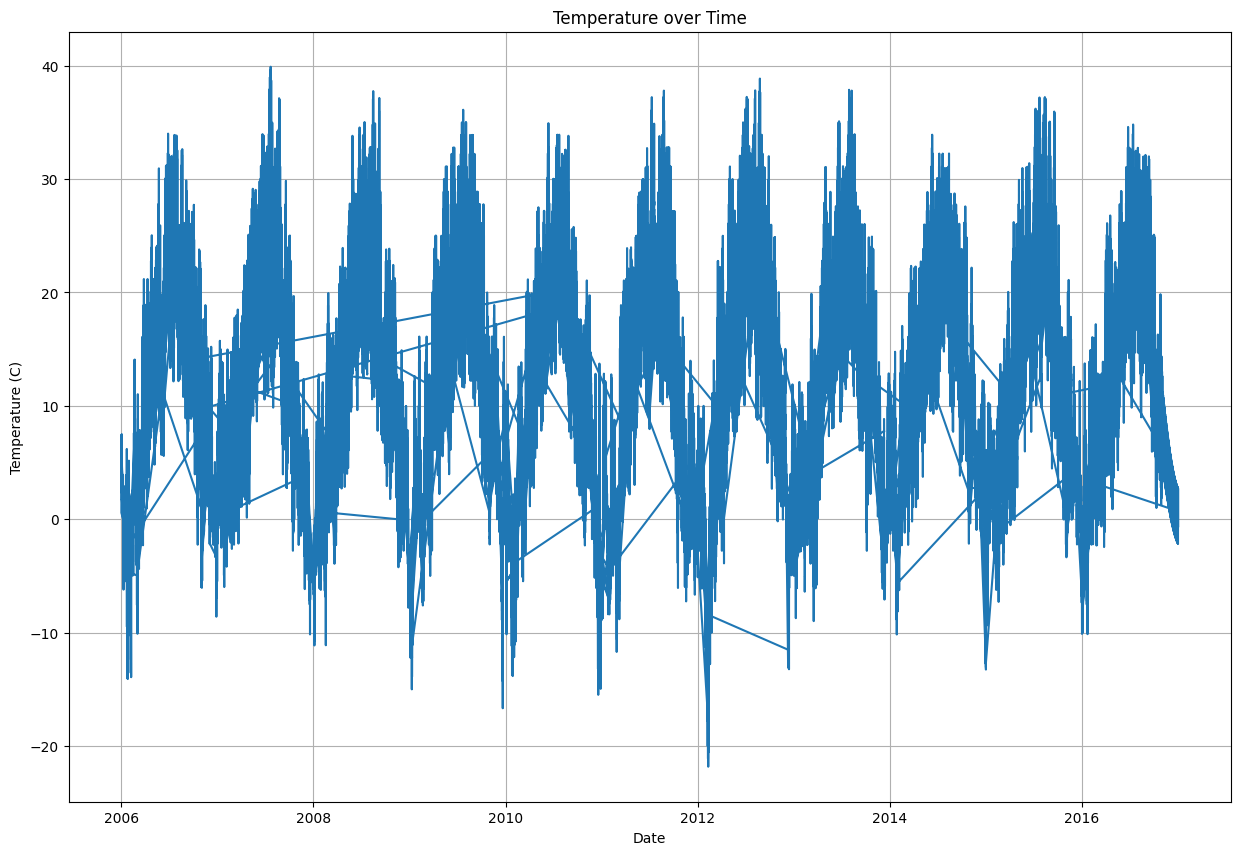

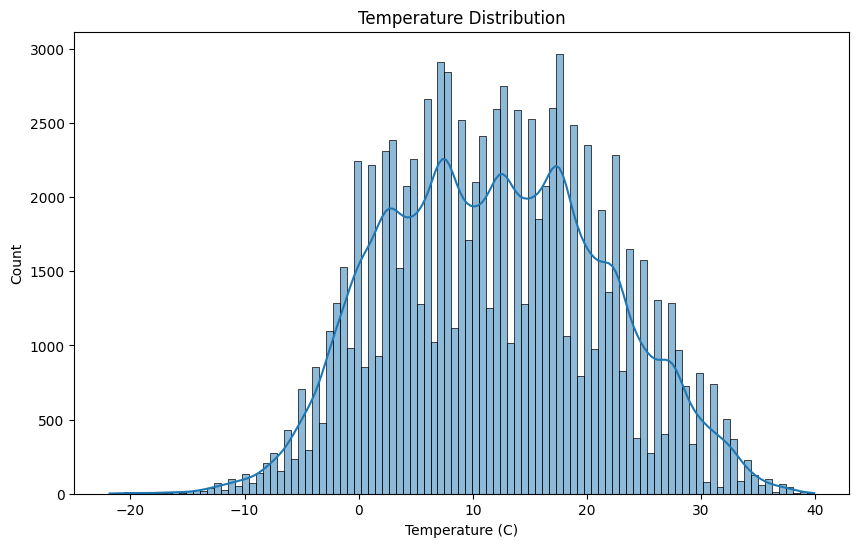

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(ds['Formatted Date'], ds['Temperature (C)'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(ds['Temperature (C)'], kde=True)
plt.title('Temperature Distribution')
plt.show()

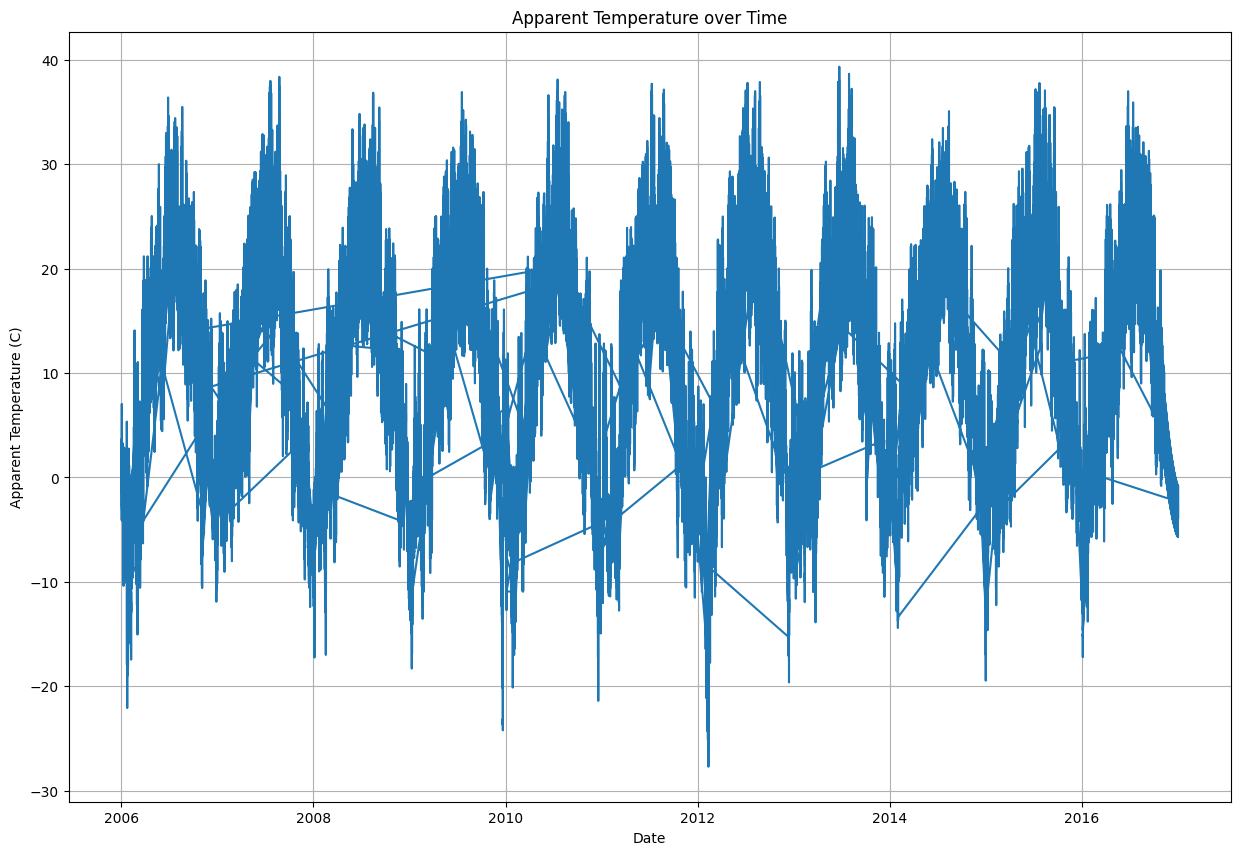

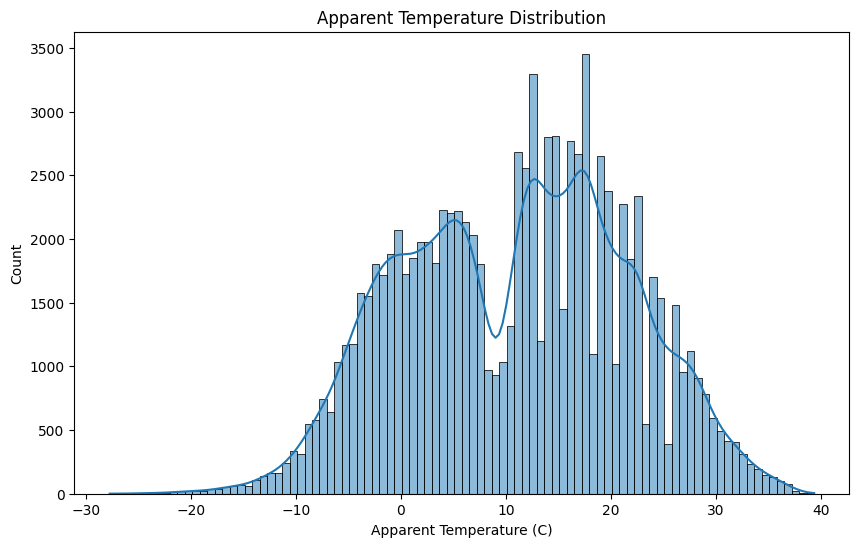

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(ds['Formatted Date'], ds['Apparent Temperature (C)'])
plt.xlabel('Date')
plt.ylabel('Apparent Temperature (C)')
plt.title('Apparent Temperature over Time')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(ds['Apparent Temperature (C)'], kde=True)
plt.title('Apparent Temperature Distribution')
plt.show()

Conclusion:

Other than the drop in number of instances between 8 - 10 °C in the apparent Temperature, there is no significant difference in temperature and apparent different.

My assumption would be that either one of the both temperature reading would give a steady and constant result.

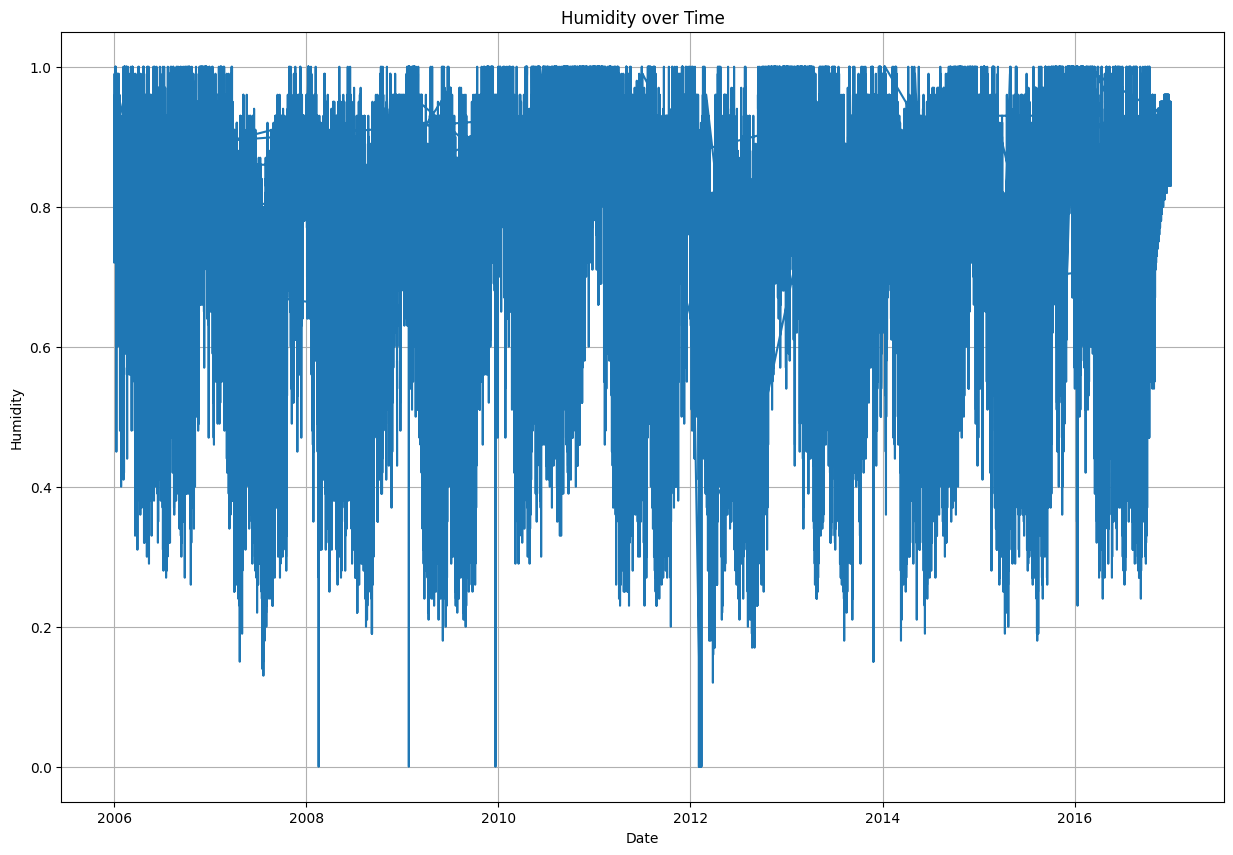

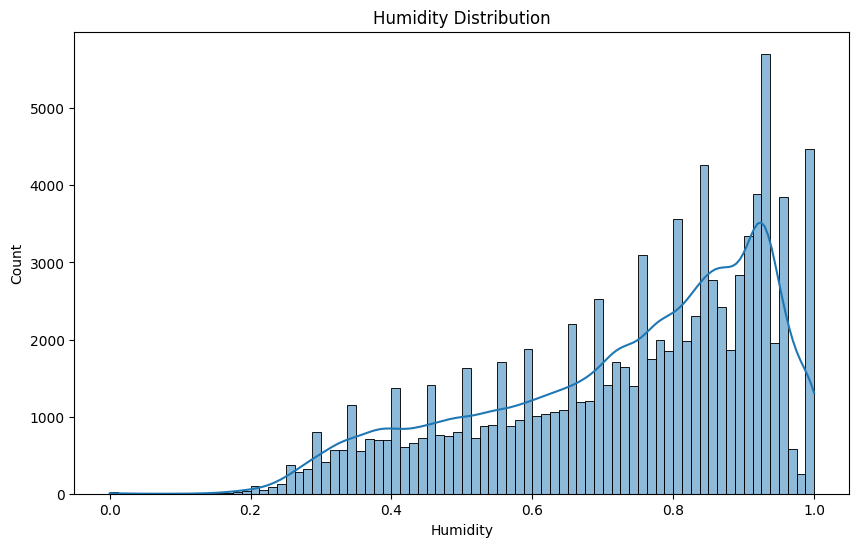

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(ds['Formatted Date'], ds['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity over Time')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(ds['Humidity'], kde=True)
plt.title('Humidity Distribution')
plt.show()

Understanding the fields:



1.   Temperature ==> the actual environment temperature.
2.   Apparent Temperature ==> According to Kestrel Instruments,

> "The apparent temperature is the combined index of heat and humidity. It is an index of the body's sensation of heat caused by the temperature and humidity (the reverse of the “wind chill factor”)." This is also known as "feels like".

3.   Humidity ==> The water vapour in the surrounding air
4.   Wind speed and Wind bearings ==> To determined how fast the wind current travels and the directions its heading. Can be use to determined how long the rain will last.

5.   Visibility ==> Not sure refering to visibility on land or in the sky. Based on the sample, I make an assumption it is on land
6.   Loud Cover ==> Will change the name later to Cloud Cover. Statistic shows value of 0.0 on all fronts. Not sure if it was a mistake, sensor mulfuction or actual reading.

7.   Pressure ==> Assuming the atmosphere pressure.
8.   Daily summary ==> Observation of the sky made by humans.

Will do calculation for correlations after cleaning to find out more.

# Step 3: Cleaning the dataset to prepare for machine learning algorithm

Rounding the following fields to 2 decimal place

In [17]:
columns_to_round = ['Temperature (C)','Apparent Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)']
ds[columns_to_round] = ds[columns_to_round].round(2)

In [18]:
ds.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly cloudy throughout the day.


Conclusion:

There is a very strong positive correlation between Temperature (C) and Apparent Temperature (C), which is expected as apparent temperature is usually a function of the actual temperature.

Checking for null values.

In [19]:
ds.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Replacing null value under 'Precip Type' to 'no rain'.

In [20]:
ds['Precip Type'].fillna('no rain', inplace=True)

In [21]:
ds.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [22]:
ds.drop_duplicates(inplace = True)

In [23]:
rain_data = ds[ds['Daily Summary'].str.contains('rain', case=False)]

# Display the unique values and their counts
print(rain_data['Daily Summary'].value_counts())


Daily Summary
Light rain in the morning.                  24
Light rain until morning.                   24
Light rain in the morning and afternoon.    24
Light rain starting overnight.              24
Rain throughout the day.                    24
Rain until morning.                         24
Light rain overnight.                       24
Rain until afternoon.                       24
Name: count, dtype: int64


Replacing row that contains the value 'snow' to 'no rain'. This is so that the only value left are 'rain' and 'no rain'.

In [24]:
ds['Rain Indicator'] = np.where(ds['Daily Summary'].str.contains('rain', case=False), 'rain', 'no rain')

# Display the first few rows to verify the new column
print(ds.head())

              Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00+02:00  Partly Cloudy        rain             9.47   
1  2006-04-01 01:00:00+02:00  Partly Cloudy        rain             9.36   
2  2006-04-01 02:00:00+02:00  Mostly Cloudy        rain             9.38   
3  2006-04-01 03:00:00+02:00  Partly Cloudy        rain             8.29   
4  2006-04-01 04:00:00+02:00  Mostly Cloudy        rain             8.76   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.39      0.89              14.12   
1                      7.23      0.86              14.26   
2                      9.38      0.89               3.93   
3                      5.94      0.83              14.10   
4                      6.98      0.83              11.04   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0            15.83         0.0               1015.13   
1                   25

In [25]:
ds["Rain Indicator"].value_counts()

Rain Indicator
no rain    96237
rain         192
Name: count, dtype: int64

In [26]:
ds["Precip Type"].value_counts()

Precip Type
rain       85200
snow       10712
no rain      517
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Precip Type'>

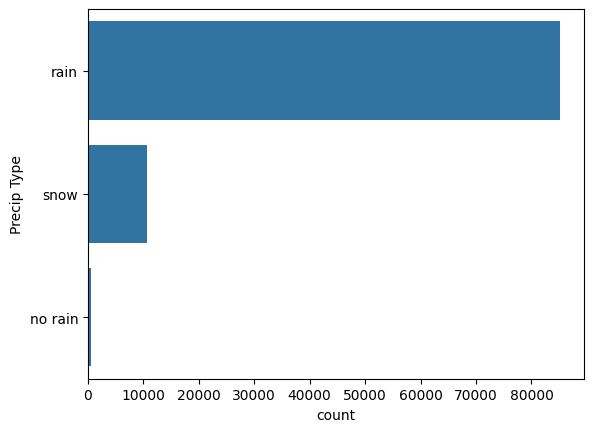

In [27]:
sns.countplot(ds["Precip Type"])

In [28]:
ds['Precip Type'] = ds['Precip Type'].replace('snow', 'no rain')
ds2 = ds.copy()

In [29]:
ds2.shape

(96429, 13)

In [30]:
ds2["Precip Type"].value_counts()

Precip Type
rain       85200
no rain    11229
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Precip Type'>

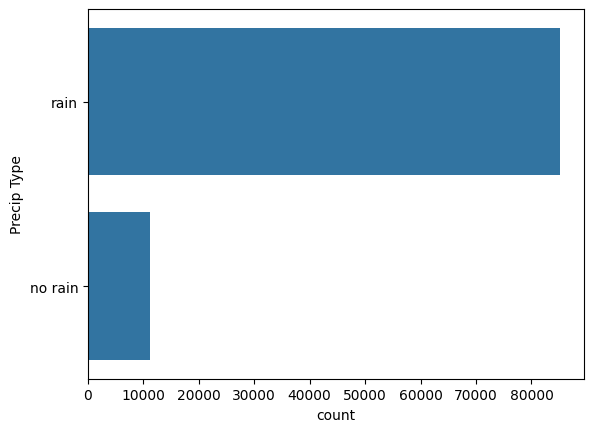

In [31]:
sns.countplot(ds2["Precip Type"])

<Axes: xlabel='count', ylabel='Rain Indicator'>

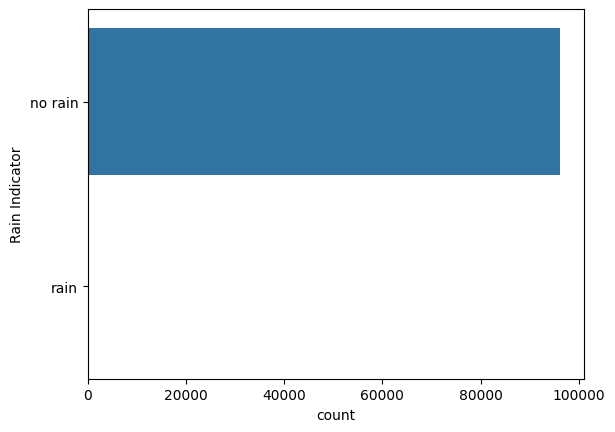

In [32]:
sns.countplot(ds['Rain Indicator'])

Changing the 'Loud Cover' to 'Cloud Cover'

In [33]:
ds2.rename(columns={"Loud Cover": "Cloud Cover"}, inplace=True)

In [34]:
ds2.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Rain Indicator
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly cloudy throughout the day.,no rain
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly cloudy throughout the day.,no rain


Trying to check the environment conditions between rain and no rain.
This is to ensure that the correct target is selected

In [35]:
ds2['Precip Type'] = ds2['Precip Type'].astype('category')

# Sample 2 data points each for "no rain" and "rain"
sample_no_rain = ds2[ds2['Precip Type'] == 'no rain'].sample(5, random_state=42)
sample_rain = ds2[ds2['Precip Type'] == 'rain'].sample(5, random_state=42)

# Concatenate the samples
sample_df = pd.concat([sample_no_rain, sample_rain])

# Display the samples
print(sample_df)

                  Formatted Date                   Summary Precip Type  \
47241  2011-01-29 09:00:00+01:00                     Foggy     no rain   
81208  2015-02-12 19:00:00+01:00                     Clear     no rain   
21158  2008-01-08 14:00:00+01:00                     Foggy     no rain   
37122  2010-12-30 18:00:00+01:00                     Foggy     no rain   
46545  2011-02-28 09:00:00+01:00             Mostly Cloudy     no rain   
86340  2015-10-14 16:00:00+02:00                  Overcast        rain   
36375  2010-08-30 15:00:00+02:00             Mostly Cloudy        rain   
17997  2008-04-26 21:00:00+02:00             Partly Cloudy        rain   
74555  2014-06-10 14:00:00+02:00             Partly Cloudy        rain   
50367  2011-05-07 16:00:00+02:00  Breezy and Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
47241            -6.09                     -6.09      0.93               0.29   
81208            -0.03 

Visualisation matrix and graph. Correlations between different fields.

Reasons for culculating correlations after cleaning:

*   Unclean data may interfere with the results



In [36]:
ds2.corr(numeric_only=True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992625,-0.632329,0.009313,0.029888,0.392875,NaN,-0.005481
Apparent Temperature (C),0.992625,1.000000,-0.602640,-0.056323,0.028925,0.381744,NaN,-0.000250
Humidity,-0.632329,-0.602640,1.000000,-0.225080,0.000689,-0.369187,NaN,0.005456
Wind Speed (km/h),0.009313,-0.056323,-0.225080,1.000000,0.103941,0.100792,NaN,-0.049241
Wind Bearing (degrees),0.029888,0.028925,0.000689,0.103941,1.000000,0.047602,NaN,-0.011665
Visibility (km),0.392875,0.381744,-0.369187,0.100792,0.047602,1.000000,NaN,0.059825
Cloud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005481,-0.000250,0.005456,-0.049241,-0.011665,0.059825,NaN,1.000000


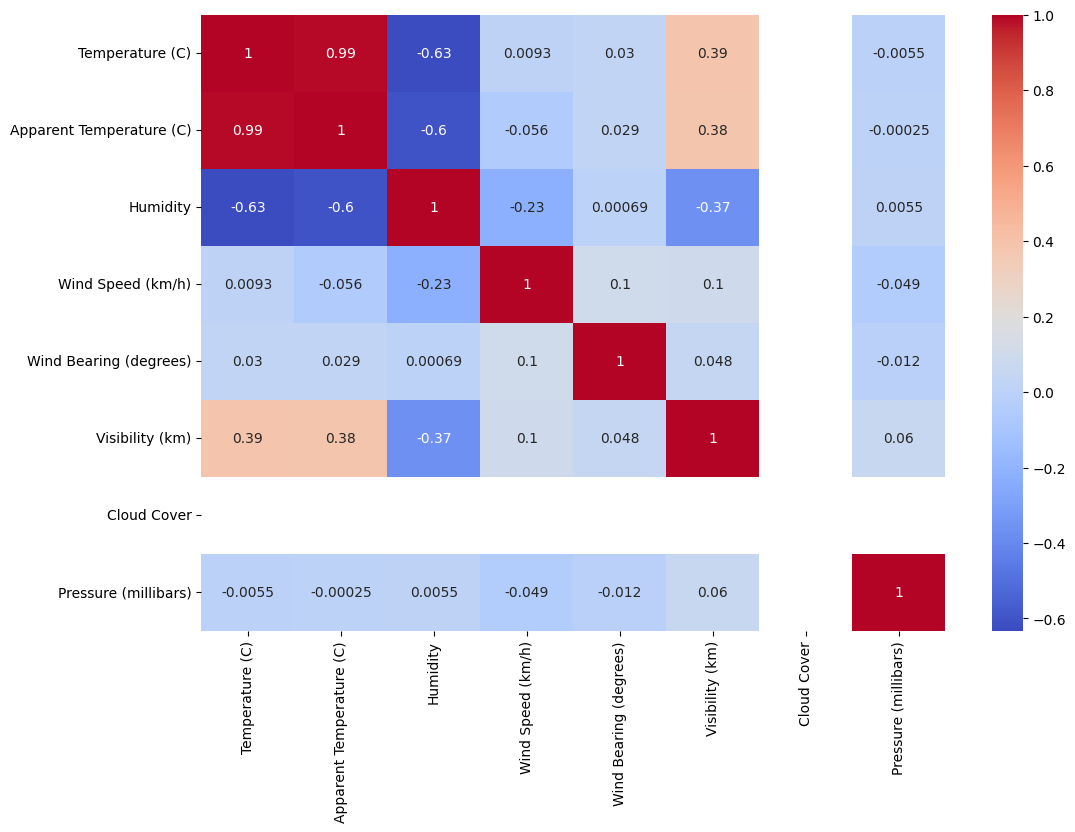

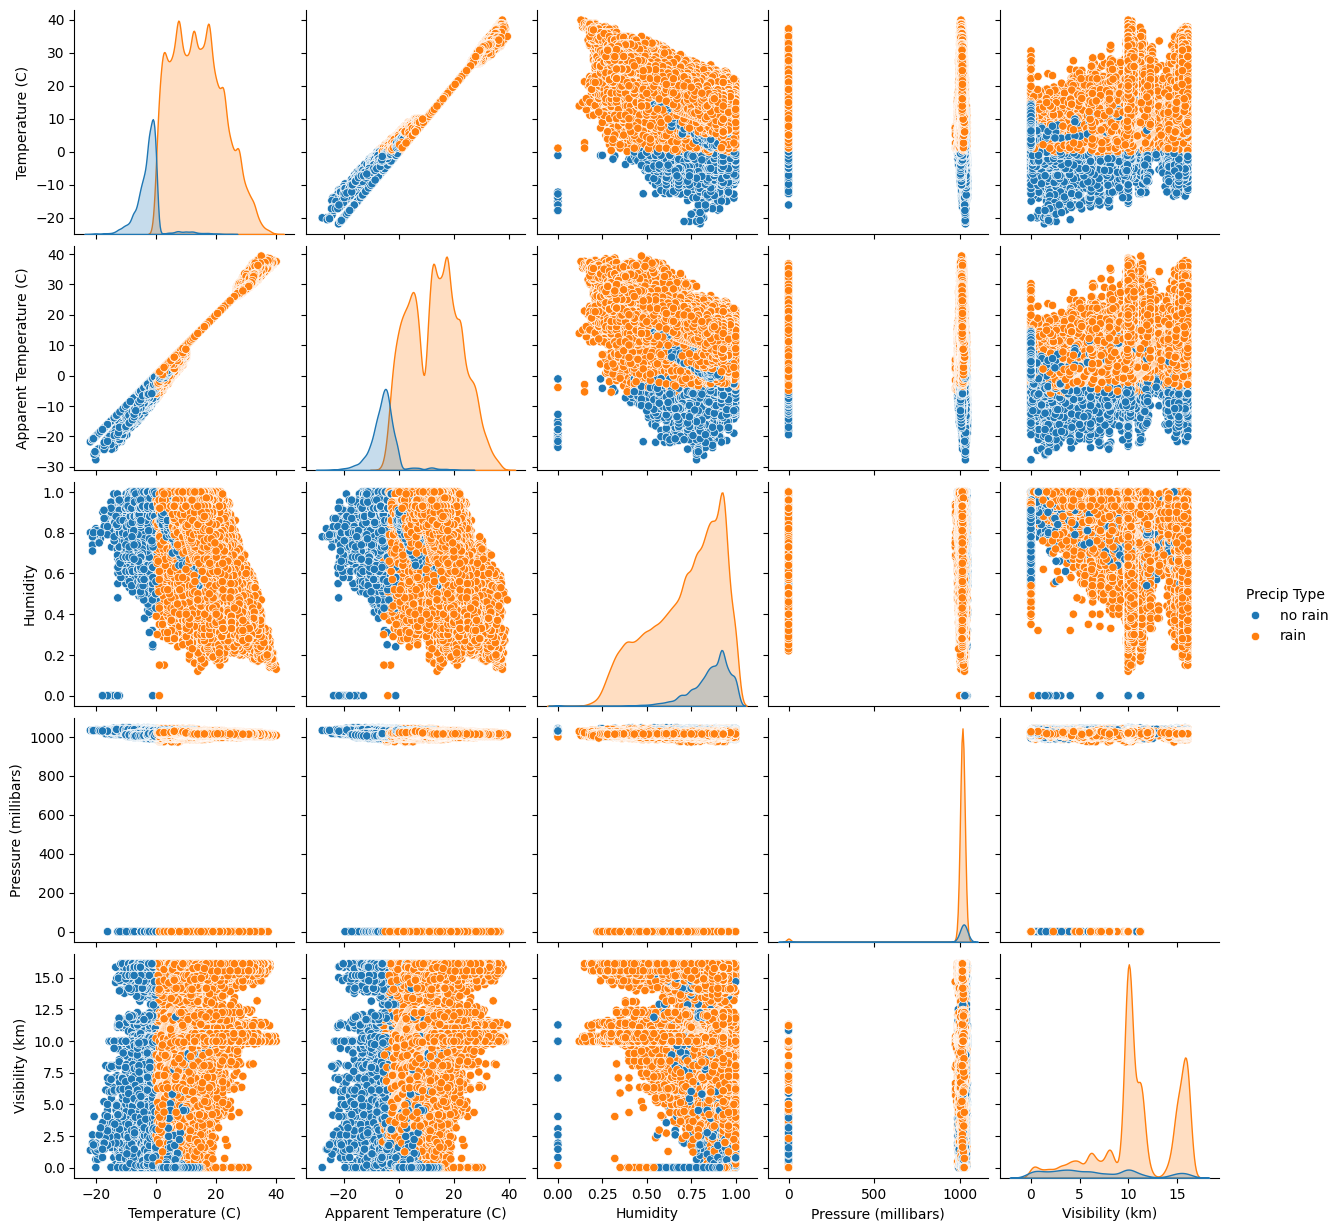

In [37]:
numerical_ds2 = ds2.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_ds2.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(ds2[['Temperature (C)','Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Visibility (km)', 'Precip Type']], hue='Precip Type')
plt.show()

Conclusion:
* Temperature and Apparent Temperature:
There is a strong positive correlation between Temperature and Apparent Temperature, as expected.
Rain and no rain data points overlap considerably in this feature space, indicating that temperature alone may not be a strong predictor of precipitation type.

* Temperature and Humidity:
Higher humidity values tend to correlate with rain, while lower humidity values are more associated with no rain.
This suggests that humidity is a significant predictor of precipitation type.

* Temperature and Wind Speed:
The scatter plots show some separation where rain events tend to have higher wind speeds compared to no rain events, but the overlap is significant.

* Temperature and Visibility:
There is a clear pattern where lower visibility is more associated with rain, while higher visibility is associated with no rain.
This indicates that visibility could be a useful feature in predicting precipitation type.

* Temperature and Pressure:
There is some separation where higher pressure is generally associated with no rain and lower pressure with rain, but again there is a significant overlap.

* Other Pairwise Relationships:
 * Apparent Temperature vs. Humidity: Similar patterns as with actual temperature, with higher humidity corresponding to rain.

 * Humidity vs. Wind Speed: Higher wind speeds slightly correlate with rain, though with significant overlap.

 * Humidity vs. Visibility: Lower visibility correlates with rain, higher visibility with no rain.

 * Pressure vs. Visibility: Higher pressure is generally associated with no rain, while lower pressure correlates with rain.

* Cloud Cover: Due to correlation between cloud cover and other fields, I decided to not include it as a feature.

I decided to use Rain Indicator as a target as precip Type only tells the content of the cloud. It will not tell us whether it is raining or not.

# Step 4: Training the model

Dropping non-numerical and cloud cover from the feature

In [38]:
X = ds2.drop(['Formatted Date','Summary','Precip Type','Daily Summary','Cloud Cover','Rain Indicator'], axis=1)

Selecting the target. Converts the Precip Type column to binary values, where rain is 1 and no rain is 0.


In [39]:
y = ds2['Rain Indicator'].apply(lambda x: 1 if x == 'rain' else 0)  # Binary encoding

Spliting the data

Why I use random_state?

1. Reproducibility: Setting random_state ensures that the randomness in the code can be reproduced. This is important for debugging and for others to replicate the results.

2. Consistency: It ensures that different parts of the code that require randomness behave consistently every time the code is run.

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, shuffle=True, test_size=0.2, stratify=y, random_state = 42)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SMOTE (Synthetic Minority Over-sampling Technique)** vs

**ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning)**

Due to a imbalance data between rain and no rain, such techniques are needed.

Results is at the end conclusion section.

In [70]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

Testting out models (Random Forest Classifier, Gradient Boosting Classifier and Logistic Regression) to see which produce the best result.

In [71]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [72]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Step 5: Training and evaluating the models

In [73]:
from sklearn.model_selection import cross_val_score

results = {}
for model_name, model in models.items():
    # Cross-validation on resampled training data
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print("Shape of y_test:", y_test.shape)
    print("Shape of y_pred:", y_pred.shape)
    results[model_name] = {
        'CV F1 Score': cv_scores.mean(),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Test Precision': precision_score(y_test, y_pred),
        'Test Recall': recall_score(y_test, y_pred),
        'Test F1 Score': f1_score(y_test, y_pred)
    }

Shape of y_test: (19286,)
Shape of y_pred: (19286,)
Shape of y_test: (19286,)
Shape of y_pred: (19286,)
Shape of y_test: (19286,)
Shape of y_pred: (19286,)


Print the results

In [74]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")



Model: Random Forest
  CV F1 Score: 0.9571
  Test Accuracy: 0.9987
  Test Precision: 0.6765
  Test Recall: 0.6053
  Test F1 Score: 0.6389
Model: Gradient Boosting
  CV F1 Score: 0.9471
  Test Accuracy: 0.9320
  Test Precision: 0.0239
  Test Recall: 0.8421
  Test F1 Score: 0.0465
Model: Logistic Regression
  CV F1 Score: 0.7409
  Test Accuracy: 0.6549
  Test Precision: 0.0046
  Test Recall: 0.8158
  Test F1 Score: 0.0092


Conclusion:

Random Forest Classifier seems to be producing the best results.

# Step 6: Fine-tune the model (hyper-parameter tuning) using Randomised Search.



RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

Why Randomised Search not Grid Search?

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [75]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distributions
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3 ,5 ,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestClassifier(random_state=42)

# Set up the randomized search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring = 'f1')

# Fit the randomized search to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Use the best model
best_model = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 7}
Best cross-validation score: 0.9385855383548248


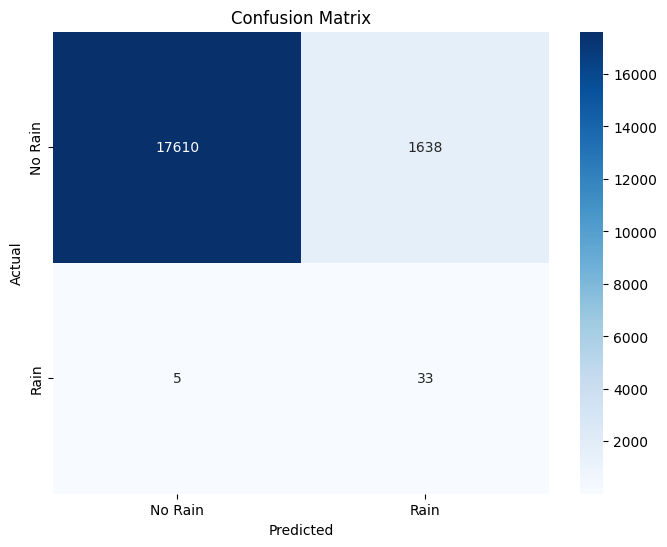

Classification Report:
               precision    recall  f1-score   support

     No Rain       1.00      0.91      0.96     19248
        Rain       0.02      0.87      0.04        38

    accuracy                           0.91     19286
   macro avg       0.51      0.89      0.50     19286
weighted avg       1.00      0.91      0.95     19286



In [76]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Rain', 'Rain']))

# Step 7: Deploying model

Saving: The joblib library is used to serialize the trained model to disk. This allows the model to be saved in a file and reused later without retraining.

Loading: The saved model can be loaded back into memory using joblib.load(), enabling it to be used for making predictions on new data.

Save the model for future use

In [77]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

Use this to load the model to make the prediction

In [79]:
import joblib
import pandas as pd

# Load the model from the file
loaded_model = joblib.load('best_random_forest_model.pkl')

# Assume new_data is a DataFrame containing the new input data
X_test = pd.DataFrame({
    'Temperature (C)': [20.0],
    'Apparent Temperature (C)': [20.0],
    'Humidity': [0.8],
    'Wind Speed (km/h)': [10.0],
    'Wind Bearing (degrees)': [180.0],
    'Visibility (km)': [10.0],
    'Pressure (millibars)': [1015.0]
})

# Make predictions
predictions = loaded_model.predict(X_test)
if predictions[0] == 0:
    print("No Rain")
else:
    print("Rain")

No Rain


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# End Conclusion



According to previous results

Using SMOTE:

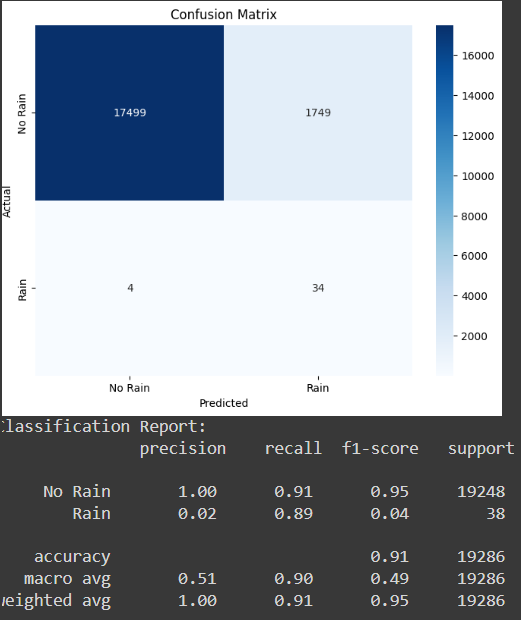


Using ADASYN:


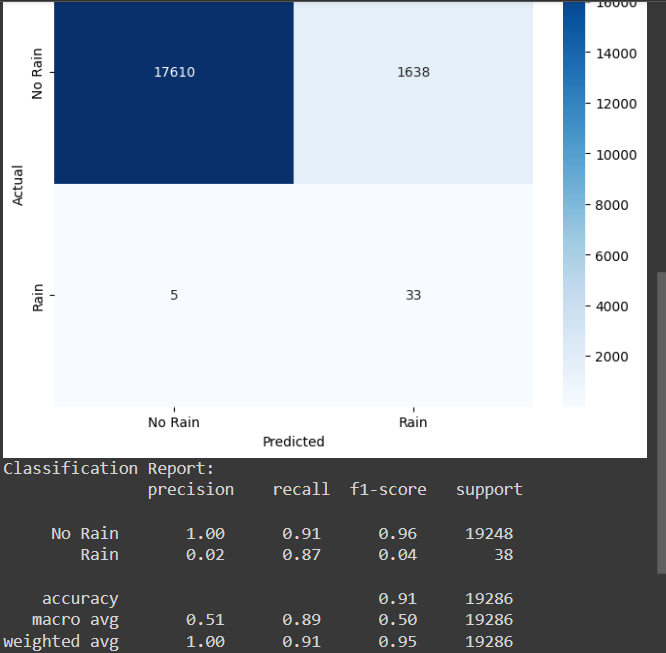

Comparing the confusion matrix, ADASYN seems to be performing better than SMOTE in terms of false report (false negatives & false positives).


The deployment was successful.

    'Temperature (C)': [20.0],
    'Apparent Temperature (C)': [20.0],
    'Humidity': [0.8],
    'Wind Speed (km/h)': [10.0],
    'Wind Bearing (degrees)': [180.0],
    'Visibility (km)': [10.0],
    'Pressure (millibars)': [1015.0]
The prediction is No Rain.